C:\Users\monaury\AppData\Local\Temp\ipykernel_14568\1233649008.py:38: RuntimeWarning: invalid value encountered in scalar power
  return(c*x**k)
C:\Users\monaury\AppData\Local\Temp\ipykernel_14568\1233649008.py:40: RuntimeWarning: invalid value encountered in scalar power
  return(c*k*x**(k-1))
c:\Users\monaury\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


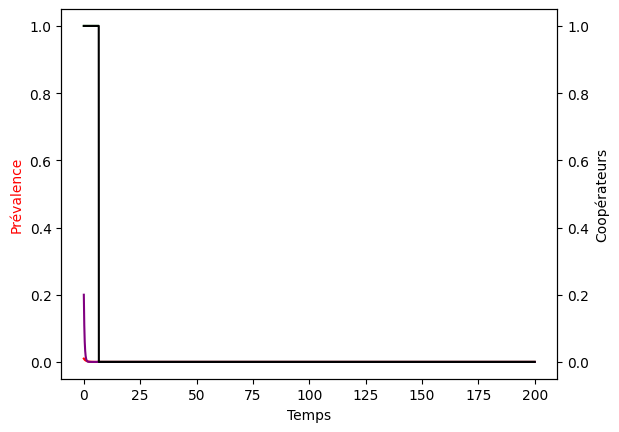

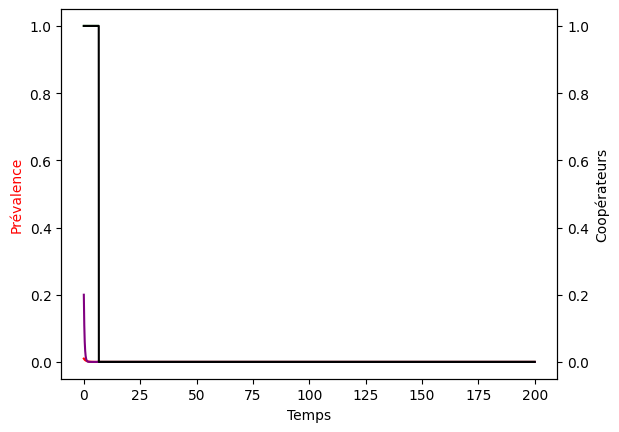

In [4]:
#application streamlit
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D






sig = 3
supinfec = 0.5
    
A=3
    

pay = 0
    
c = 4
k= 0.6
B = 1
mu =1

tmax =200
pas = 0.01
nbr_pas = int(tmax/pas)

###########################################Choix du trade offs

   

def beta(x,c, k ):
    return(c*x**k)
def beta2(x,c, k ):
    return(c*k*x**(k-1))

        



################################################# Coeur du modèle

#Ancienne version non fonctionelle



        



def model(Y0, t ,B, c, k, mu, A, supinfec,sig,pay) :
    #S, I , alpha, x = Y0
    S =Y0[0]
    I =Y0[1]
    alpha =Y0[2]
    x =Y0[3]
    N = S + I

    dS = 1 - (1 - x) * beta(alpha ,c , k) * I * S - S
    dI = (1 - x) * beta(alpha ,c , k) * I * S - alpha * I - I
    dalpha = A  *alpha*((1-x)*beta2(alpha,c, k) * (S + I* supinfec) - 1 )  
    dx =  sig*x * (1-x)*(I - pay)
    return(dS,dI,dalpha,dx)



def model_sanscoop(Y0, t ,B, c, k, mu, A, supinfec,sig,pay) :
    #S, I , alpha, x = Y0
    S =Y0[0]
    I =Y0[1]
    alpha =Y0[2]

    N = S + I

    dS = 1 - beta(alpha ,c , k) * I * S - 1 * S
    dI =  beta(alpha ,c , k) * I * S - alpha * I - I 
    dalpha = A  *alpha*(beta2(alpha,c, k) * (S + I* supinfec) - 1 )  
    return(dS,dI,dalpha)








s0 = 1

i0 = 0.01

c0 = 0.2

x0 = 1.0


temps = np.linspace(0,tmax,nbr_pas)
sol = odeint(model, y0 = [s0,i0 , c0,x0], t=temps,args = (B, c, k, mu, A, supinfec,sig,pay))




#sol = better_ode( tmax , pas ,Y0 = [i0 , c0,x0],parms =[sig,rho0,rho1,pay,c,k,A,N])
# (Y0, tmax, pas ,parms)

temps = np.linspace(0,tmax,nbr_pas)

fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(temps,sol[:,0],"green")
ax1.plot(temps,sol[:,1],"red")
ax1.plot(temps,sol[:,2],"purple")
ax2.plot(temps,sol[:,3],"black")


ax1.set_xlabel('Temps')
ax1.set_ylabel('Prévalence', color='red')
ax2.set_ylabel('Coopérateurs', color='black')

plt.show(fig1)






